In [119]:
#Standard libraries for data analysis:
    
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import uniform
from sklearn import linear_model, datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#sklearn modules for Model Evaluation & Improvement:
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
from sklearn.metrics import plot_roc_curve
#Standard libraries for data visualization:
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve
#Miscellaneous Utilitiy Libraries:
    
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

In [120]:
os.getcwd()

'C:\\Users\\oscar\\Downloads'

In [121]:
os.chdir('C:\\Users\\oscar\Downloads')

In [122]:
dataset = pd.read_excel('dataset_alternative_processed.xlsx.xlsx')

In [123]:
y = dataset['Churn Value']

X = dataset.drop(['Churn Value'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

In [124]:
from imblearn.under_sampling import RandomUnderSampler

# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
X_train, y_train = undersample.fit_resample(X_train, y_train)

## Random Forest

### Feature Selection

Optimal number of features : 26


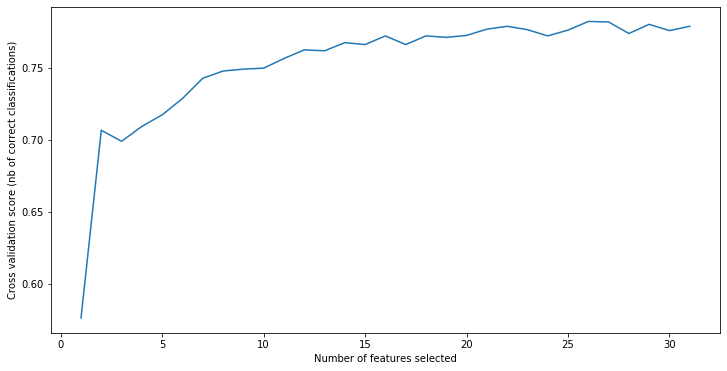

In [125]:
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold

rfecv = RFECV(estimator= RandomForestClassifier())



pipeline = Pipeline([('Feature Selection', rfecv), ('Model', RandomForestClassifier())])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=36851234)
n_scores = cross_val_score(pipeline, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)
np.mean(n_scores)

pipeline.fit(X_train,y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

    
rfecv.support_
rfecv_df = pd.DataFrame(rfecv.ranking_,index=X.columns,columns=["Rank"]).sort_values(by="Rank",ascending=True)
rfecv_df.head()

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [126]:
rfecv_df

,Rank
Tenure Months,1
Contract_One year,1
Payment Method_Mailed check,1
Payment Method_Electronic check,1
Payment Method_Credit card (automatic),1
Streaming Movies_Yes,1
Streaming TV_Yes,1
Streaming TV_No internet service,1
Tech Support_Yes,1
Tech Support_No internet service,1


## Recreate Dataset with the optimal features

In [127]:
dataset = pd.read_excel('dataset_alternative_processed.xlsx.xlsx')

In [128]:
dataset.drop(['Multiple Lines_No phone service','Internet Service_No','Streaming Movies_No internet service','Phone Service_1','Online Security_No internet service'],axis=1, inplace=True)

In [129]:
y = dataset['Churn Value']

X = dataset.drop(['Churn Value'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

from imblearn.under_sampling import RandomUnderSampler

# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
X_train, y_train = undersample.fit_resample(X_train, y_train)

## Default Model

ROC AUC: 0.7663321191454184
f1_score: 0.633297062023939
accuracy: 0.7608232789212207
precision: 0.5339449541284403
recall: 0.7780748663101604
[[781 254]
 [ 83 291]]
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1035
           1       0.53      0.78      0.63       374

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.76      0.77      1409



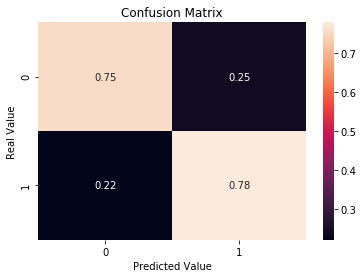

In [130]:
#RANDOM FOREST
#RForest = RandomForestClassifier(n_estimators=300, max_depth=6)
RForest = RandomForestClassifier()
                                
RForest.fit(X_train, y_train)
forest_pred= RForest.predict(X_test)

RForest_roc_auc_score_default = roc_auc_score(y_test, forest_pred)
RForesr_accuracy_default = accuracy_score(y_test, forest_pred)

print("ROC AUC:",roc_auc_score(y_test, forest_pred))
print("f1_score:",f1_score(y_test, forest_pred))
print("accuracy:",metrics.accuracy_score(y_test, forest_pred))
print("precision:",metrics.precision_score(y_test, forest_pred))
print("recall:",metrics.recall_score(y_test, forest_pred))

print(confusion_matrix(y_test, forest_pred))

# classification report
print(classification_report(y_test, forest_pred))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, forest_pred, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix')
ax.set_ylabel('Real Value')
ax.set_xlabel('Predicted Value')

plt.show()

### Hyperparameters

In [131]:
grid_params_rf = [{'criterion': ['gini', 'entropy'], # measures split quality
                   'class_weight': ['balanced'], # adjust imbalanced positive class
                   'n_estimators': [50, 100, 200, 500], # number trees to grow            
                   'max_features': ['auto', 6, None], # features considered at splits
                   'max_depth': [4, 6, 8, 10],  # max nodes in each tree
                   'min_samples_leaf': [5, 10, 15], # samples required in each leaf
                   'min_samples_split': [0.1, 0.2, 0.3, 0.4], # percentage required to split node
                    }]


clf = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid_params_rf, n_jobs=-1, cv=5, scoring='f1')
clf.fit(X_train, y_train)
clf.best_params_


{'class_weight': 'balanced',
 'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_leaf': 5,
 'min_samples_split': 0.1,
 'n_estimators': 50}

## Final Model

ROC AUC: 0.7863855950812473
f1_score: 0.6552462526766595
accuracy: 0.7714691270404542
precision: 0.5464285714285714
recall: 0.8181818181818182
[[781 254]
 [ 68 306]]
              precision    recall  f1-score   support

           0       0.92      0.75      0.83      1035
           1       0.55      0.82      0.66       374

    accuracy                           0.77      1409
   macro avg       0.73      0.79      0.74      1409
weighted avg       0.82      0.77      0.78      1409



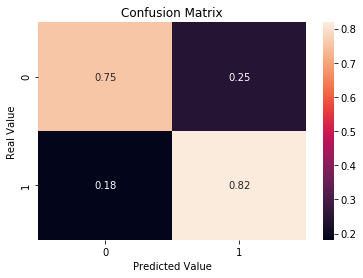

In [144]:
#RANDOM FOREST

RForest = RandomForestClassifier(class_weight= 'balanced', criterion = 'entropy', max_depth=4, max_features='auto', 
min_samples_leaf=5, min_samples_split=0.1, n_estimators=50)
                                
RForest.fit(X_train, y_train)
forest_pred= RForest.predict(X_test)

RForest_roc_auc_score_default = roc_auc_score(y_test, forest_pred)
RForesr_accuracy_default = accuracy_score(y_test, forest_pred)

print("ROC AUC:",roc_auc_score(y_test, forest_pred))
print("f1_score:",f1_score(y_test, forest_pred))
print("accuracy:",metrics.accuracy_score(y_test, forest_pred))
print("precision:",metrics.precision_score(y_test, forest_pred))
print("recall:",metrics.recall_score(y_test, forest_pred))

print(confusion_matrix(y_test, forest_pred))

# classification report
print(classification_report(y_test, forest_pred))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, forest_pred, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix')
ax.set_ylabel('Real Value')
ax.set_xlabel('Predicted Value')

plt.show()